In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATADIR = '../data'
game_id = 1
events = mio.read_event_data(DATADIR,game_id)
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away


In [3]:
shots = events[events['Type']=='SHOT']
all_goals = shots[shots['Subtype'].str.contains('-GOAL')]

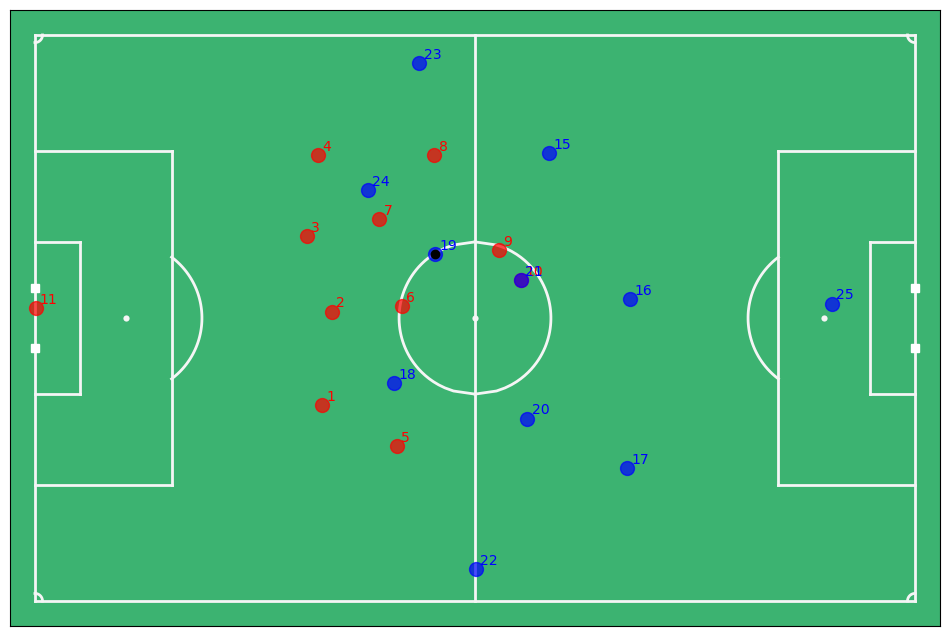

In [4]:
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame], annotate=True )

In [5]:
all_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,0.92,0.47,1.01,0.55
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,0.08,0.31,0.00,0.54
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,0.02,0.54,-0.01,0.51


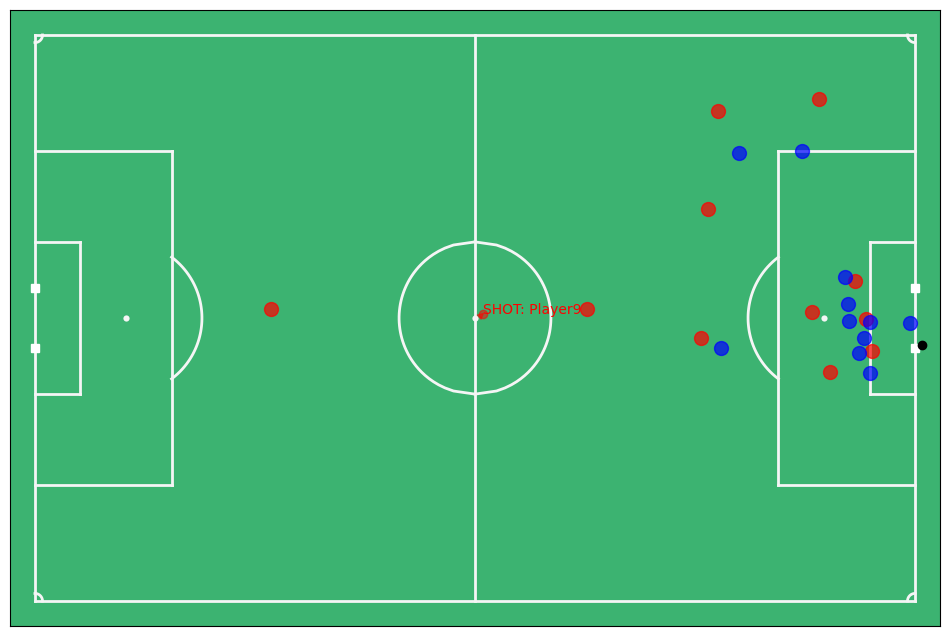

In [10]:
# First Goal
fig,ax = mviz.plot_events( events.loc[34:34], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[34]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

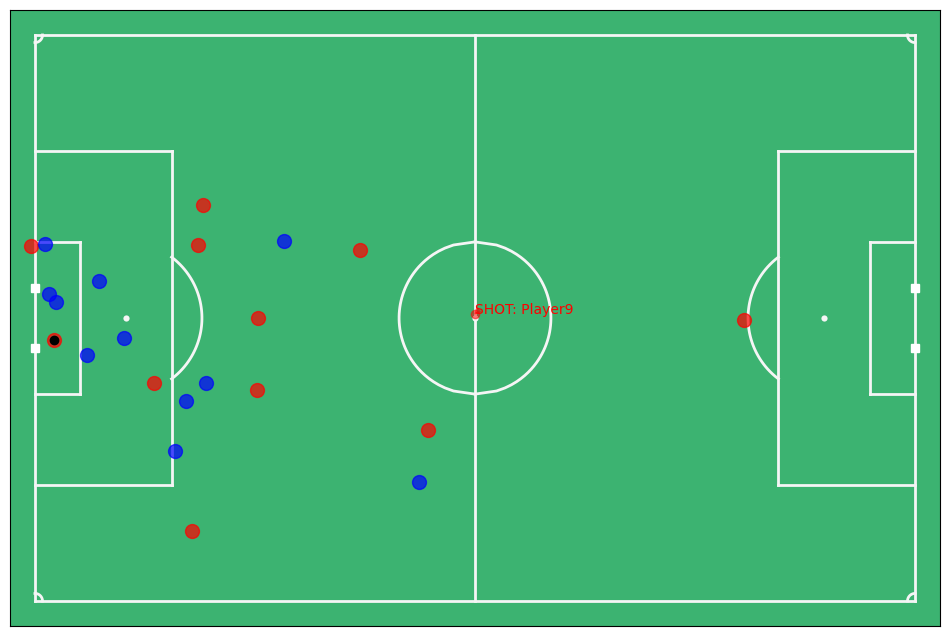

In [7]:
# Second Goal
fig,ax = mviz.plot_events( events.loc[1213:1213], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1213]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

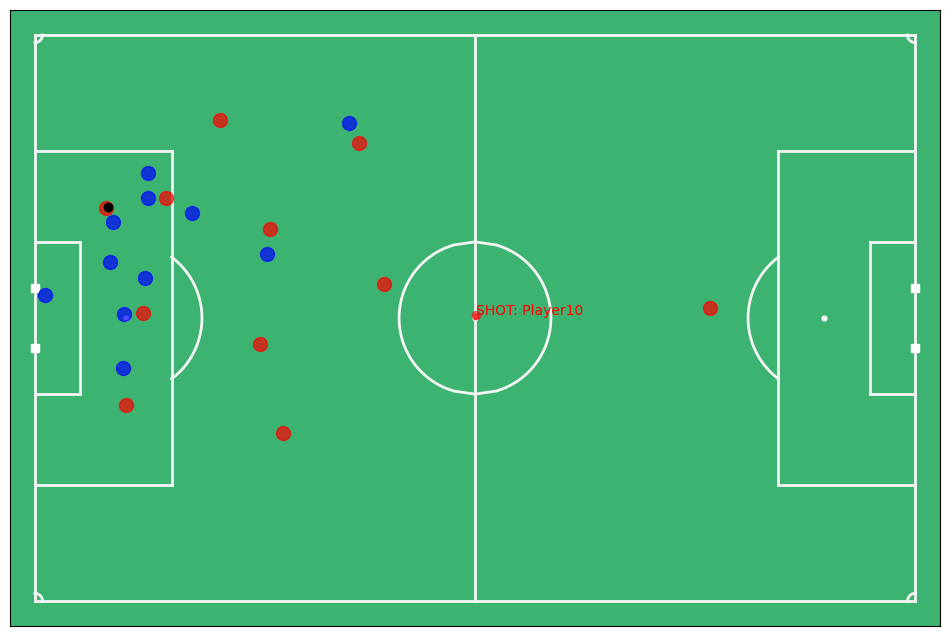

In [8]:
# Second Goal
fig,ax = mviz.plot_events( events.loc[1114:1114], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1114]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )